In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Paths
results_path = "./unlabeled_test_results"
comparison_path = os.path.join(results_path, "comparison_metrics")
augmented_path = os.path.join(results_path, "augmented_model_unlabeled_results")
base_path = os.path.join(results_path, "base_model_unlabeled_results")

In [13]:
# Load Summary from .txt file
def load_summary(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    data = {}
    class_ratios = {}
    for line in lines:
        line = line.strip()
        if line.startswith("Average Confidence:"):
            data["avg_confidence"] = float(line.split(":")[1].strip())
        elif line.startswith("Median Confidence:"):
            data["median_confidence"] = float(line.split(":")[1].strip())
        elif line.startswith("Standard Deviation of Confidence:"):
            data["std_confidence"] = float(line.split(":")[1].strip())
        elif line.startswith("Average Width:"):
            data["avg_width"] = float(line.split(":")[1].strip())
        elif line.startswith("Average Height:"):
            data["avg_height"] = float(line.split(":")[1].strip())
        elif line.endswith("%"):
            class_name, ratio = line.split(":")
            class_ratios[class_name.strip()] = float(ratio.strip().replace("%", ""))
    data["class_ratios"] = class_ratios
    return data

In [14]:
# Aggregate results for all test sets
def aggregate_results(results_path):
    results = []
    for test_set in range(1, 6):
        summary_path = os.path.join(results_path, f"test_set_{test_set}", "summary.txt")
        if os.path.exists(summary_path):
            result = load_summary(summary_path)
            result["test_set"] = test_set
            results.append(result)
    return pd.DataFrame(results)

In [15]:
# Load Comparison Metrics
def load_comparison_metrics(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    data = {}
    for line in lines:
        line = line.strip()
        if line.startswith("Agreement Ratio:"):
            data["agreement_ratio"] = float(line.split(":")[1].strip().replace("%", ""))
        elif line.startswith("Base Model Avg Confidence:"):
            data["base_avg_confidence"] = float(line.split(":")[1].strip())
        elif line.startswith("Augmented Model Avg Confidence:"):
            data["augmented_avg_confidence"] = float(line.split(":")[1].strip())
    return data

In [16]:
# Aggregate comparison results
def aggregate_comparison_results(comparison_path):
    results = []
    for test_set in range(1, 6):
        comparison_file = os.path.join(comparison_path, f"test_set_{test_set}_comparison.txt")
        if os.path.exists(comparison_file):
            result = load_comparison_metrics(comparison_file)
            result["test_set"] = test_set
            results.append(result)
    return pd.DataFrame(results)

In [17]:
# Visualize Individual Model Results
def visualize_model_results(model_name, results):
    # Plot class ratios
    class_ratios_df = pd.DataFrame(results["class_ratios"].tolist(), index=results["test_set"])
    class_ratios_df.plot(kind='bar', figsize=(12, 6), title=f"{model_name} Class Ratios")
    plt.xlabel("Test Set")
    plt.ylabel("Percentage")
    plt.show()

    # Confidence statistics
    results[["avg_confidence", "median_confidence", "std_confidence"]].plot(
        kind='bar', figsize=(12, 6), title=f"{model_name} Confidence Statistics"
    )
    plt.xlabel("Test Set")
    plt.ylabel("Confidence")
    plt.show()

    # Average Box Size
    results[["avg_width", "avg_height"]].plot(
        kind='bar', figsize=(12, 6), title=f"{model_name} Average Box Size"
    )
    plt.xlabel("Test Set")
    plt.ylabel("Size (pixels)")
    plt.show()

In [18]:
# Visualize general comparison
def visualize_comparison(base_results, augmented_results):
    # Compare average confidence
    comparison_df = pd.DataFrame({
        "Base Model Avg Confidence": base_results["avg_confidence"],
        "Augmented Model Avg Confidence": augmented_results["avg_confidence"]
    }, index=base_results["test_set"])
    comparison_df.plot(kind='bar', figsize=(12, 6), title="Average Confidence Comparison")
    plt.xlabel("Test Set")
    plt.ylabel("Average Confidence")
    plt.show()

    # Compare class ratios
    for class_name in base_results["class_ratios"].iloc[0].keys():
        base_ratios = [cr.get(class_name, 0) for cr in base_results["class_ratios"]]
        augmented_ratios = [cr.get(class_name, 0) for cr in augmented_results["class_ratios"]]
        comparison_df = pd.DataFrame({
            "Base Model": base_ratios,
            "Augmented Model": augmented_ratios
        }, index=base_results["test_set"])
        comparison_df.plot(kind='bar', figsize=(12, 6), title=f"Class Ratio Comparison: {class_name}")
        plt.xlabel("Test Set")
        plt.ylabel("Percentage")
        plt.show()

In [26]:
# Visualize test set based comparison
def visualize_comparison_metrics(comparison_results):
    # Agreement Ratio
    comparison_results[["agreement_ratio"]].plot(
        kind='bar', figsize=(12, 6), title="Agreement Ratio Across Test Sets"
    )
    plt.xlabel("Test Set")
    plt.ylabel("Agreement Ratio (%)")
    plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100
    plt.show()

    # Compare Average Confidence
    comparison_results[["base_avg_confidence", "augmented_avg_confidence"]].plot(
        kind='bar', figsize=(12, 6), title="Average Confidence Comparison Across Test Sets"
    )
    plt.xlabel("Test Set")
    plt.ylabel("Average Confidence")
    plt.show()

In [20]:
# Load data
augmented_results = aggregate_results(augmented_path)
base_results = aggregate_results(base_path)
comparison_results = aggregate_comparison_results(comparison_path)

# Visualize Base Model

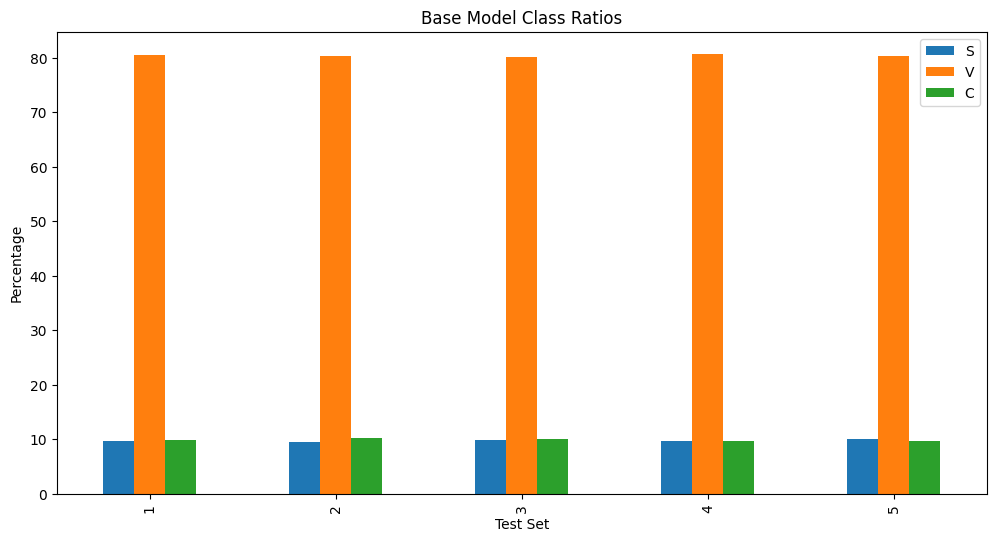

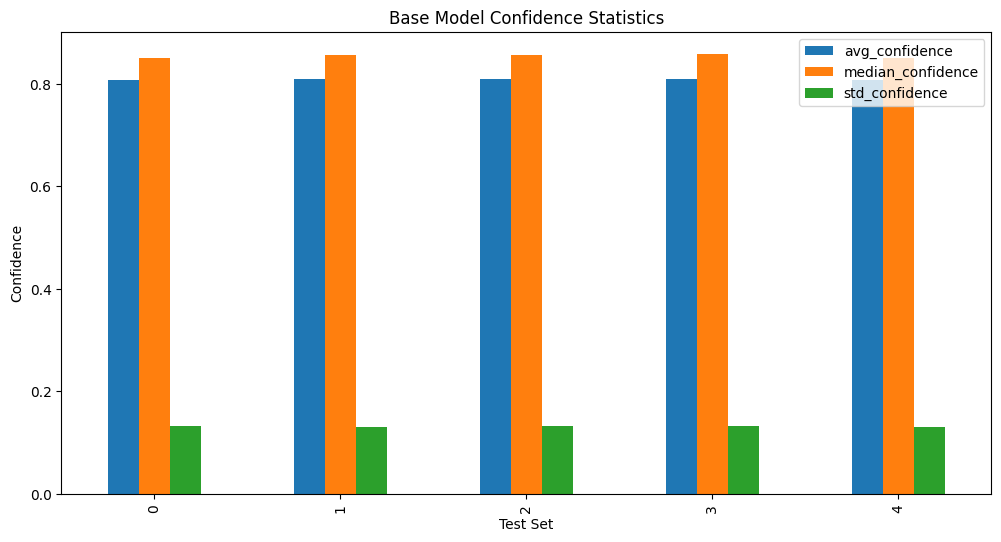

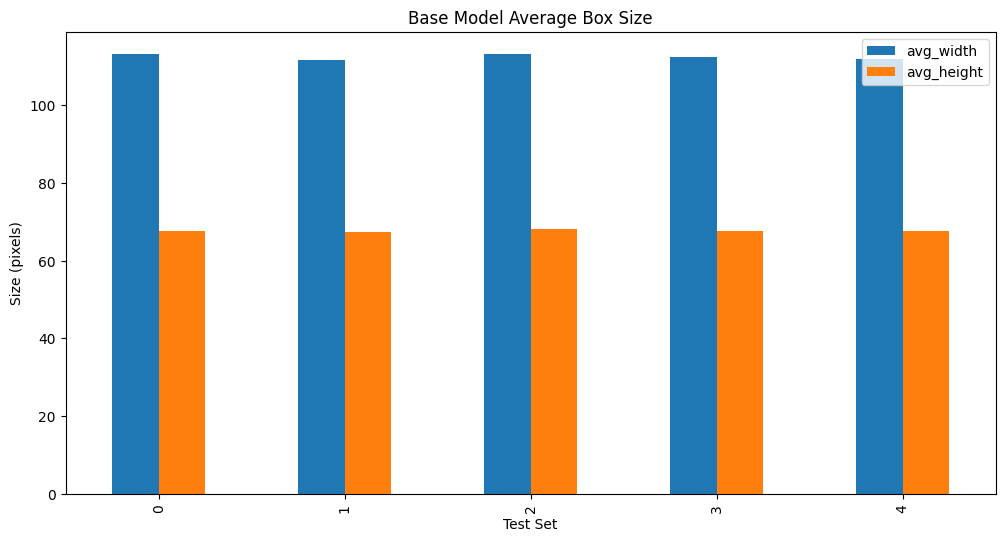

In [8]:
visualize_model_results("Base Model", base_results)

# Visualize Augmented Model

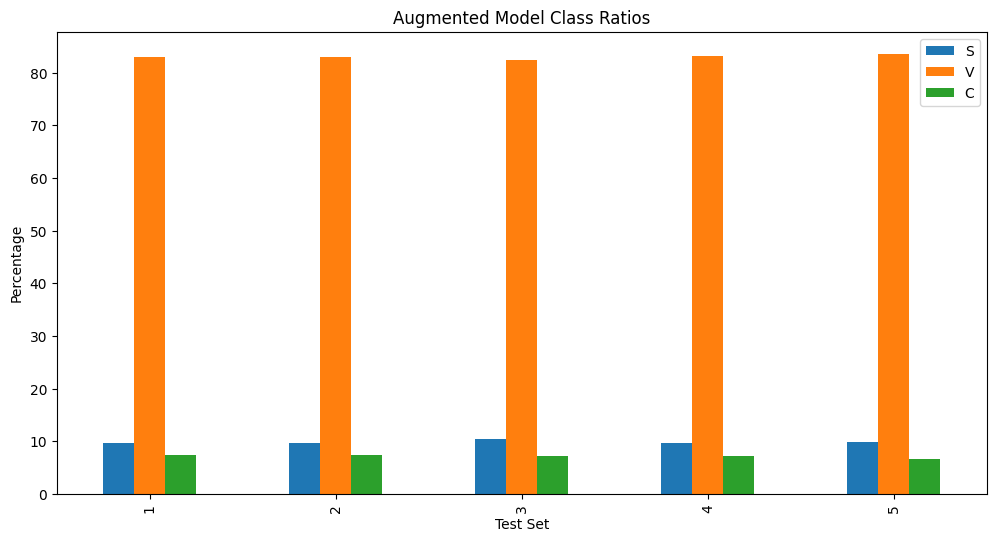

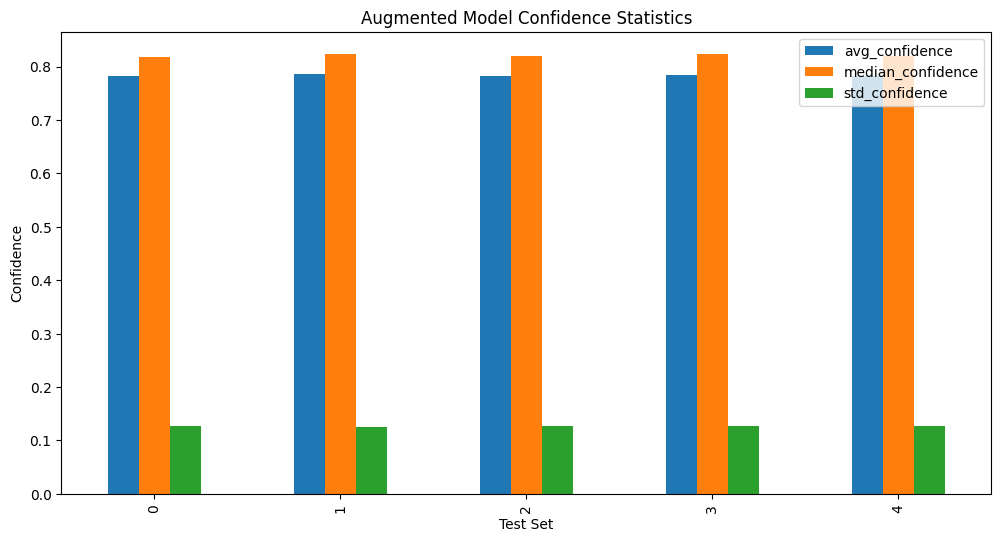

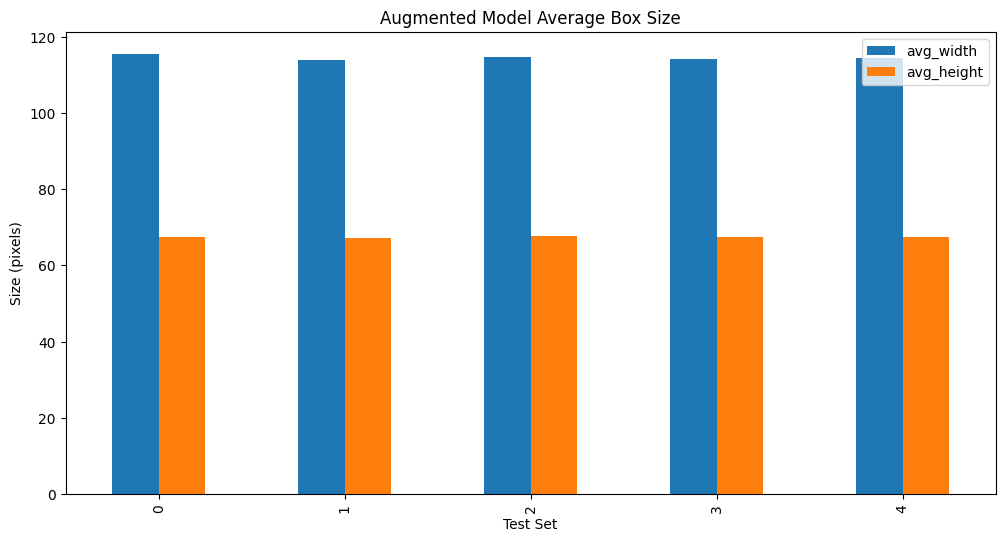

In [9]:
visualize_model_results("Augmented Model", augmented_results)

# Comparison

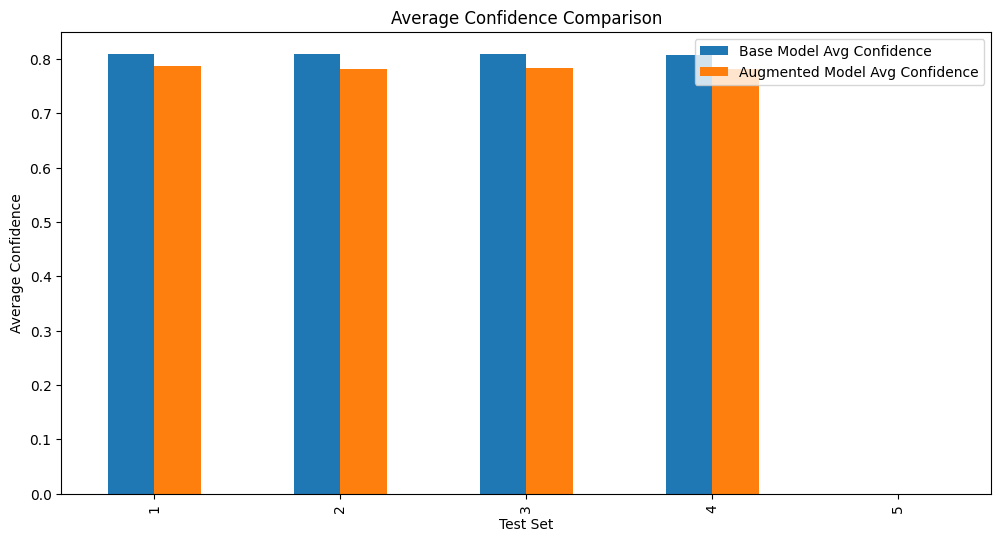

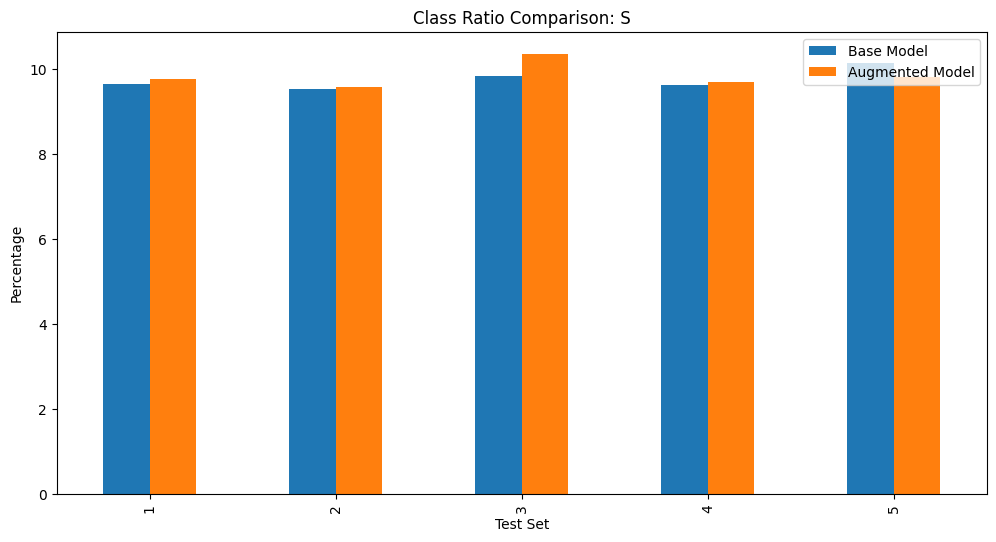

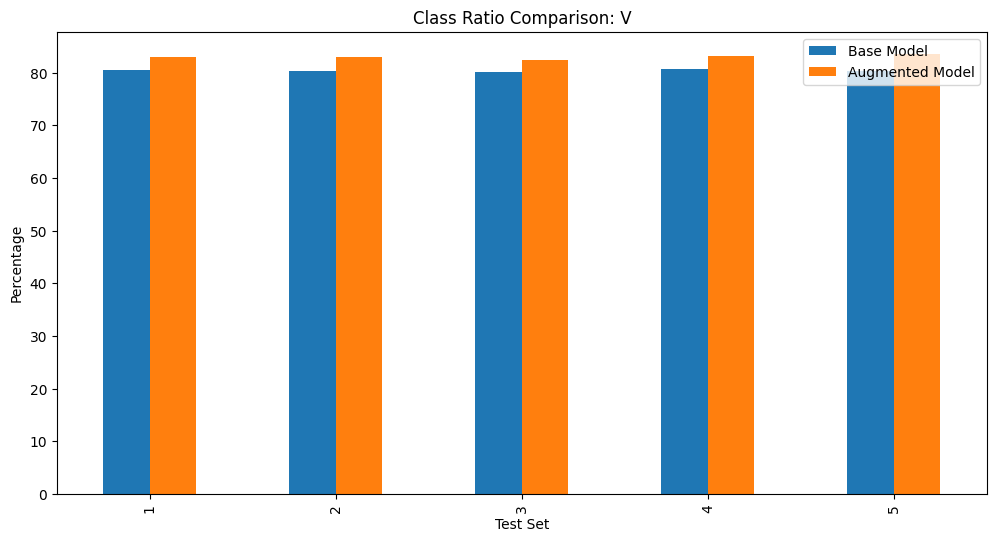

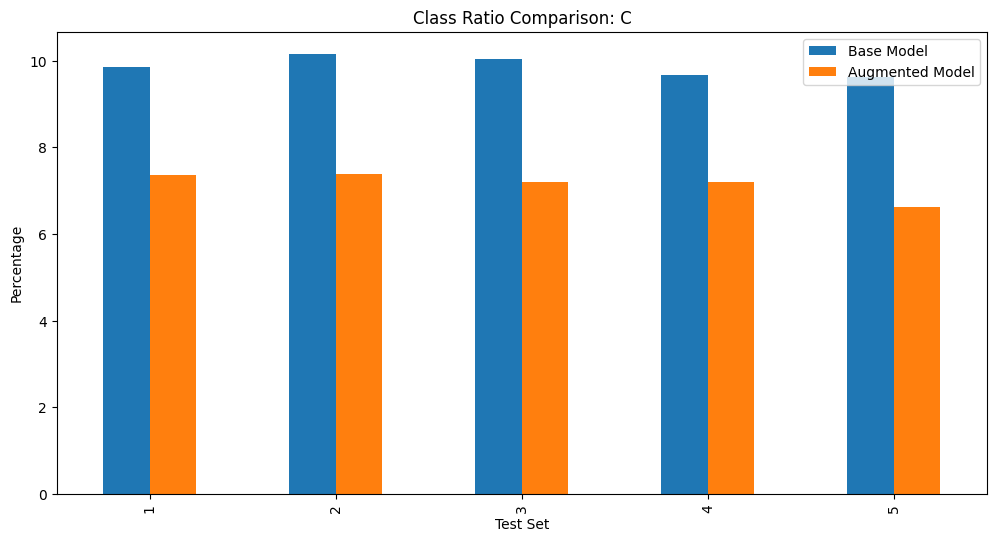

In [10]:
# Visualize Comparison
visualize_comparison(base_results, augmented_results)

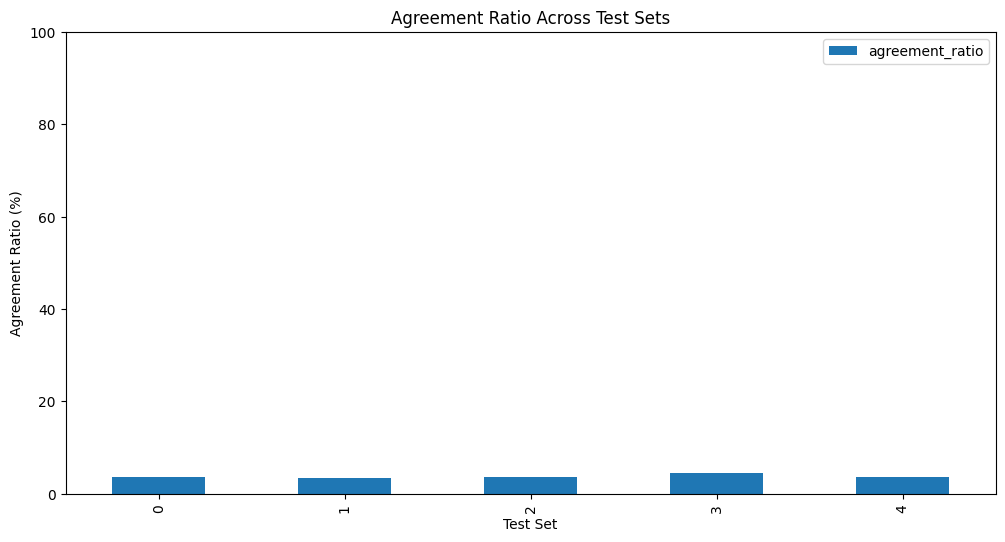

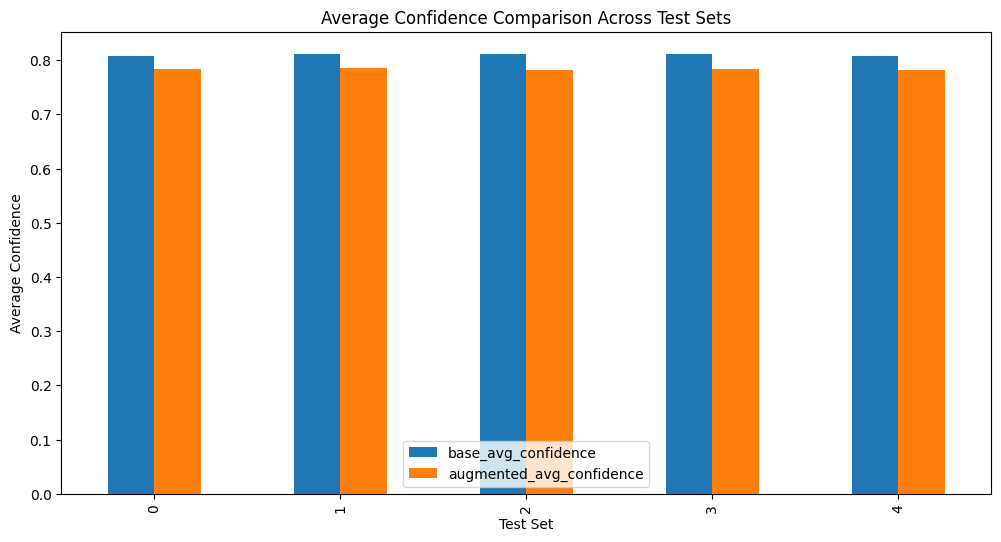

In [27]:
# Visualize Comparison based on test sets
visualize_comparison_metrics(comparison_results)